<a href="https://colab.research.google.com/github/sean-otoole/HODD/blob/main/prepare_training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install scanpy anndata umap-learn python-igraph louvain h5py leidenalg > /dev/null 2>&1

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import os
os.chdir("/content/drive/MyDrive/HODD/Kamath_et_al_2022")

In [44]:
import scanpy as sc
import pandas as pd
from scipy.io import mmread
import scipy.sparse

# File paths
meta_path = "METADATA_PD.tsv.gz"
matrix_path = "GSE178265_Homo_matrix.mtx.gz"
barcodes_path = "GSE178265_Homo_bcd.tsv.gz"
features_path = "Homo_features.tsv"

# Load sparse count matrix
X = mmread(matrix_path).tocsc()  # Convert to Compressed Sparse Column format for efficiency

# Load barcodes (cell IDs)
barcodes = pd.read_csv(barcodes_path, header=None, sep="\t")[0].values  # Read as a NumPy array

# Load gene names/features
genes = pd.read_csv(features_path, header=None, sep="\t")[0].values  # Read as a NumPy array

# Create AnnData object
adata = sc.AnnData(X.T)
adata.obs_names = barcodes  # Assign cell barcodes
adata.var_names = genes  # Assign gene names

# Load the metadata
metadata_df = pd.read_csv(meta_path, sep="\t")  # Adjust delimiter if needed
metadata_df = metadata_df.drop(metadata_df.index[0])  # Drops unnecessary row
metadata_df = metadata_df.reset_index(drop=True)  # Resets the index values

# Ensure "Name" is the barcode column before setting it as the index
metadata_df = metadata_df.set_index("NAME")

# Reorder metadata to match AnnData object & handle missing barcodes safely
metadata_df = metadata_df.reindex(adata.obs_names)  # Ensures the same order, fills missing barcodes with NaN

# Assign the DataFrame to adata.obs
adata.obs = metadata_df

# Verify
print(adata)


<ipython-input-44-ae10219a81e3>:27: DtypeWarning: Columns (3,13,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv(meta_path, sep="\t")  # Adjust delimiter if needed


AnnData object with n_obs × n_vars = 434340 × 41625
    obs: 'libname', 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'date', 'Donor_Age', 'Donor_PMI', 'Status', 'Cause_of_Death', 'FACS_Classification'


In [45]:
adata.obs

,libname,biosample_id,donor_id,species,species__ontology_label,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,date,Donor_Age,Donor_PMI,Status,Cause_of_Death,FACS_Classification
pPDCN4340DAPIA030419_AATGCCACACAAGCAG-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
pPDCN4340DAPIA030419_AGACTCAGTCACAATC-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
pPDCN4340DAPIA030419_ATACTTCCAGCGTTGC-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
pPDCN4340DAPIA030419_ATATCCTGTGTGTTTG-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
pPDCN4340DAPIA030419_ATCCACCGTGGGTTGA-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pPDsHSrSNxi3298d200429PosB_CATACTTGTCTGATCA-1,pPDsHSrSNxi3298d200429PosB,pPDsHSrSNxi3298d200429PosB,3298,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001965,substantia nigra pars compacta,EFO_0009901,10x 3' v1,male,200429,79,22,Ctrl,Prostate cancer,Positive
pPDsHSrSNxi3298d200429PosB_TTTGTTGTCCTTGAAG-1,pPDsHSrSNxi3298d200429PosB,pPDsHSrSNxi3298d200429PosB,3298,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001965,substantia nigra pars compacta,EFO_0009901,10x 3' v1,male,200429,79,22,Ctrl,Prostate cancer,Positive
pPDsHSrSNxi3298d200429PosB_ACACTGACACTAGAGG-1,pPDsHSrSNxi3298d200429PosB,pPDsHSrSNxi3298d200429PosB,3298,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001965,substantia nigra pars compacta,EFO_0009901,10x 3' v1,male,200429,79,22,Ctrl,Prostate cancer,Positive
pPDsHSrSNxi3298d200429PosB_CAACAACAGCTCGAAG-1,pPDsHSrSNxi3298d200429PosB,pPDsHSrSNxi3298d200429PosB,3298,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001965,substantia nigra pars compacta,EFO_0009901,10x 3' v1,male,200429,79,22,Ctrl,Prostate cancer,Positive


In [46]:
# subset the data for NR4A2 positive nuclei

adata = adata[adata.obs["FACS_Classification"] == "Positive"].copy()

# Filter the AnnData object for only "normal" and "Parkinson disease"
adata = adata[adata.obs["disease__ontology_label"].isin(["normal", "Parkinson disease"])]

In [47]:
# calculate standard quality control metrics

# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

<ipython-input-47-53f747c6a125>:4: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var_names.str.startswith("MT-")


In [48]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

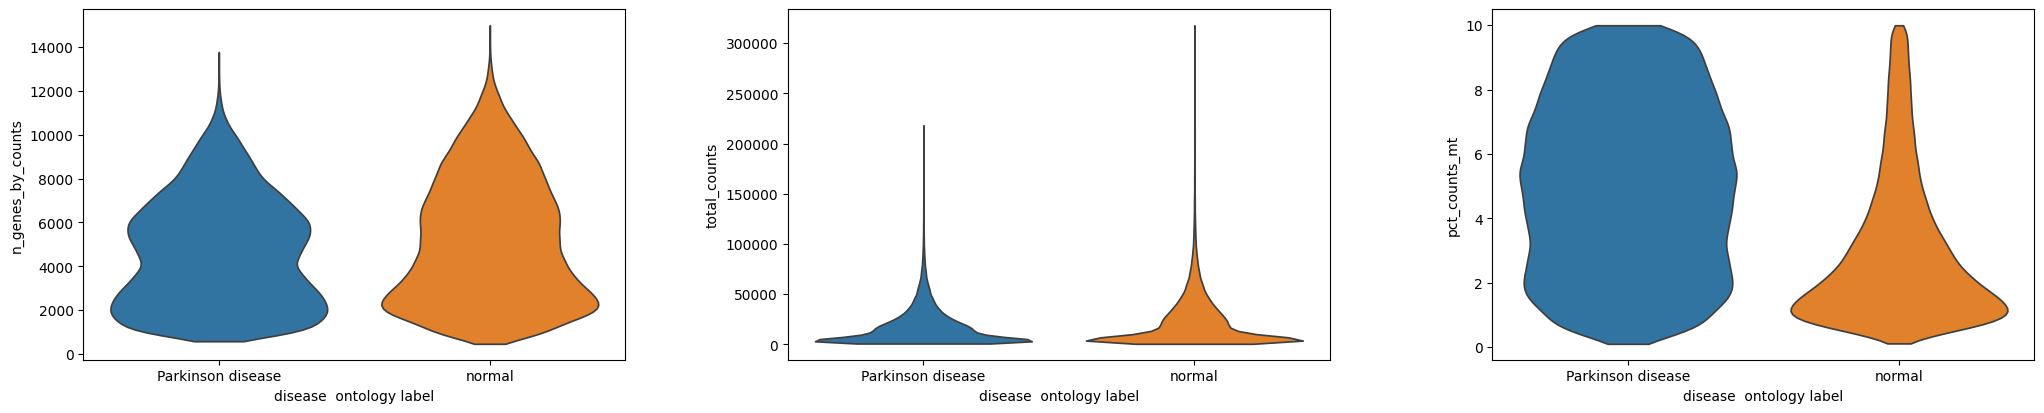

In [49]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True,
    groupby="disease__ontology_label"
)

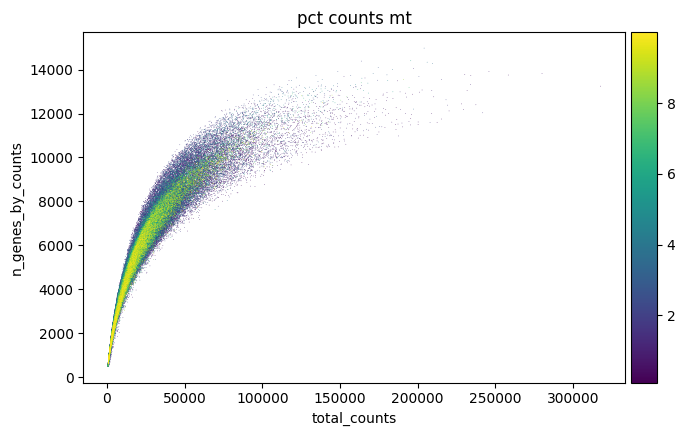

In [50]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [51]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [52]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [53]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

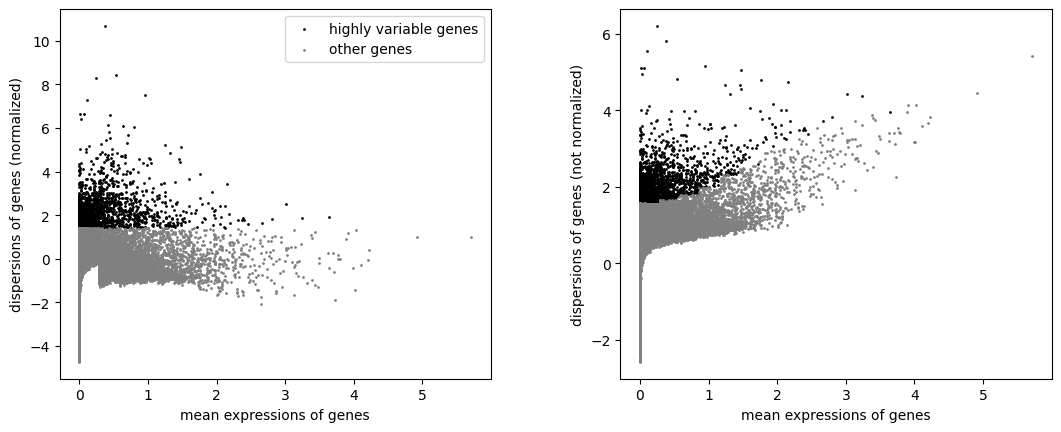

In [54]:
sc.pl.highly_variable_genes(adata)

In [55]:
sc.tl.pca(adata, n_comps=15)  # Reduce to 15 PCs

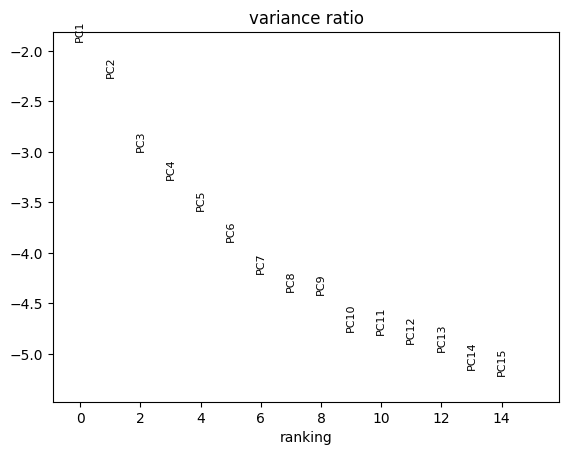

In [56]:
sc.pl.pca_variance_ratio(adata, n_pcs=15, log=True)

In [57]:
sc.pp.neighbors(adata)


In [58]:
sc.tl.umap(adata)

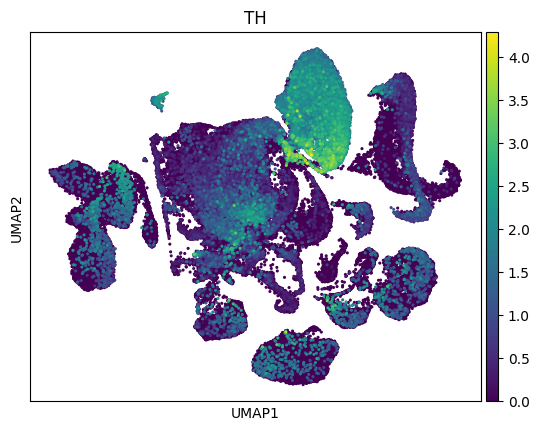

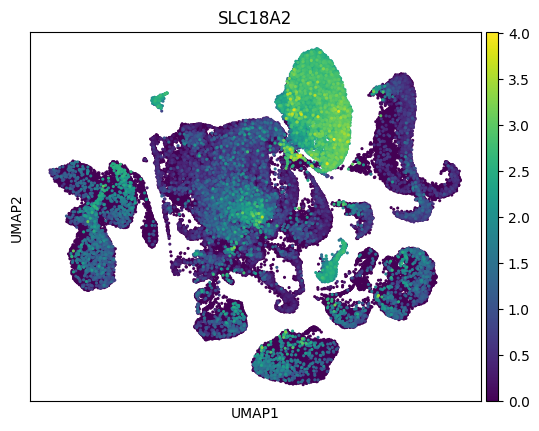

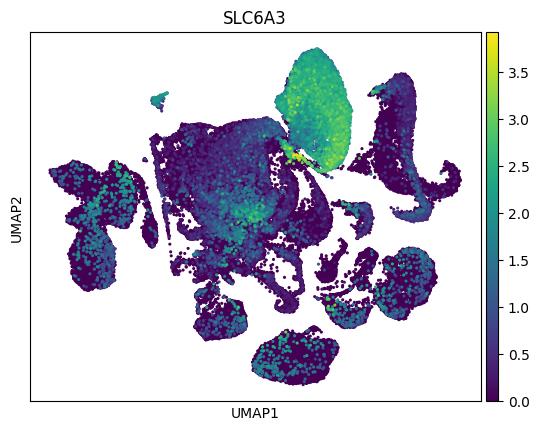

In [59]:
sc.pl.umap(adata, color="TH", cmap="viridis", size=20)
sc.pl.umap(adata, color="SLC18A2", cmap="viridis", size=20)
sc.pl.umap(adata, color="SLC6A3", cmap="viridis", size=20)

In [60]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution = 0.1)

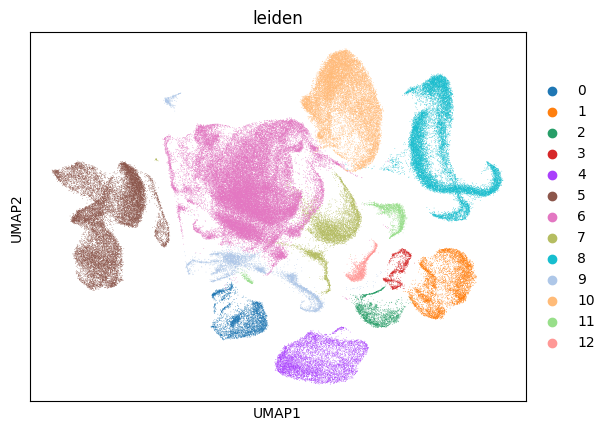

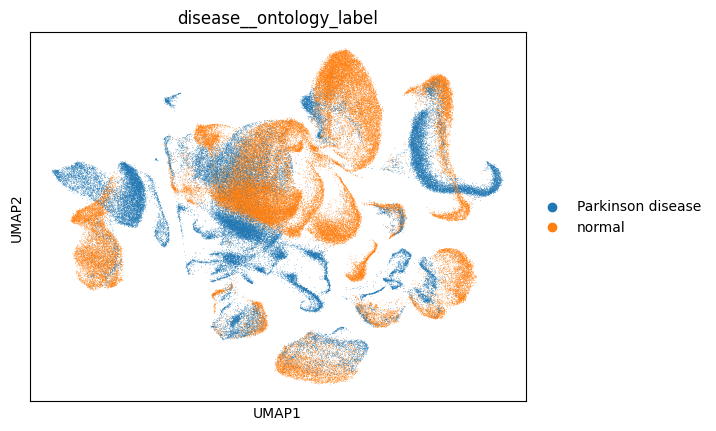

In [61]:
sc.pl.umap(adata, color=["leiden"])
sc.pl.umap(adata, color=["disease__ontology_label"])

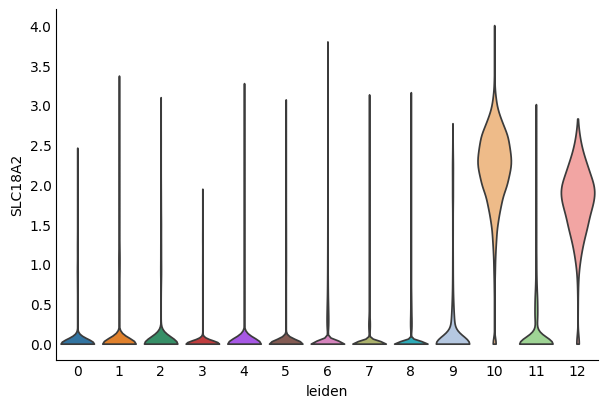

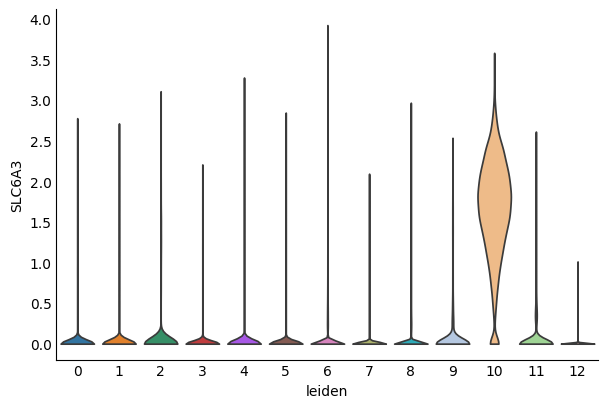

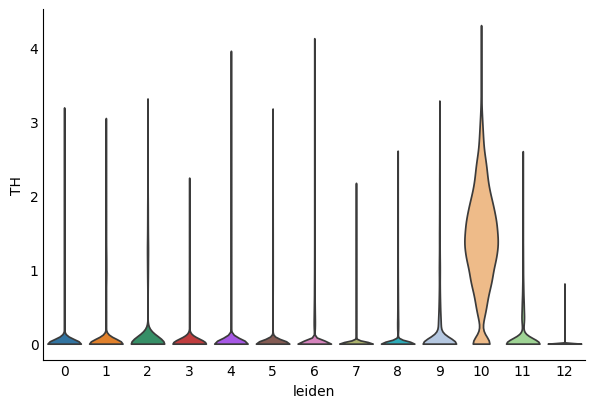

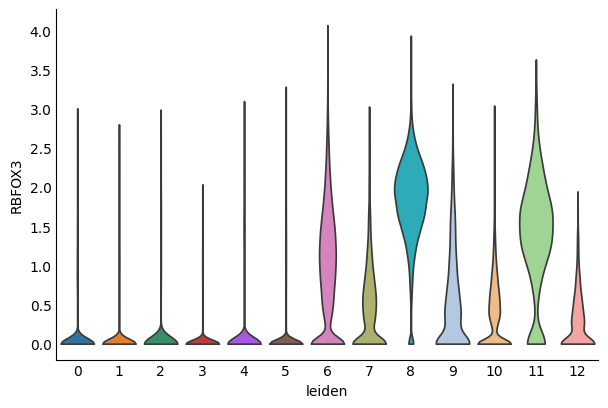

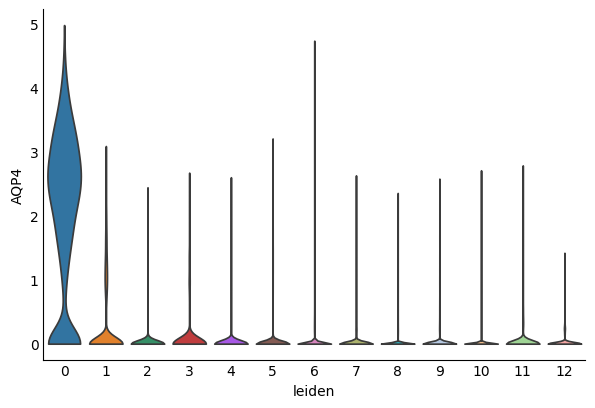

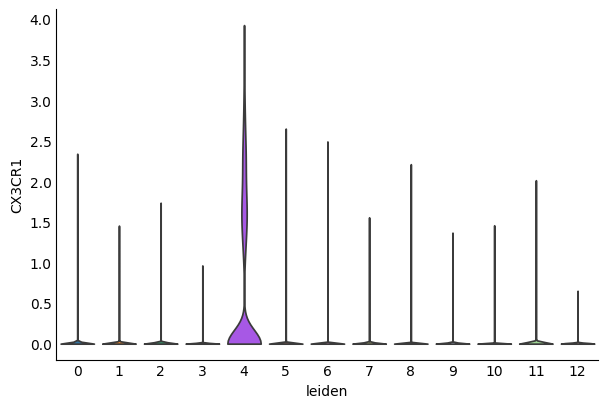

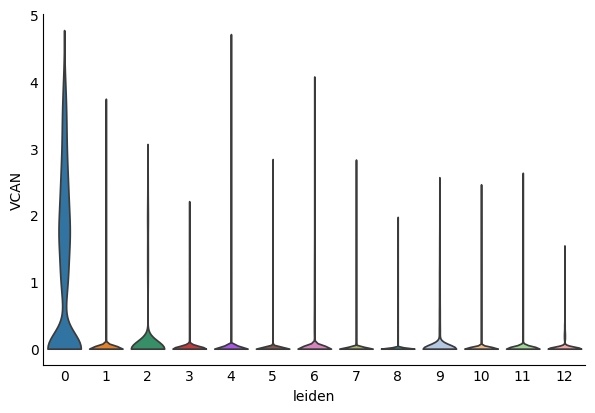

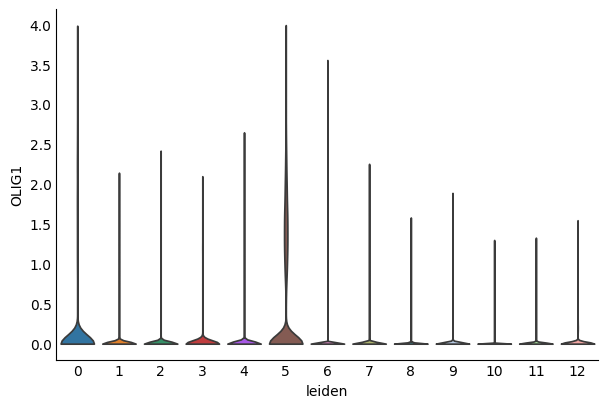

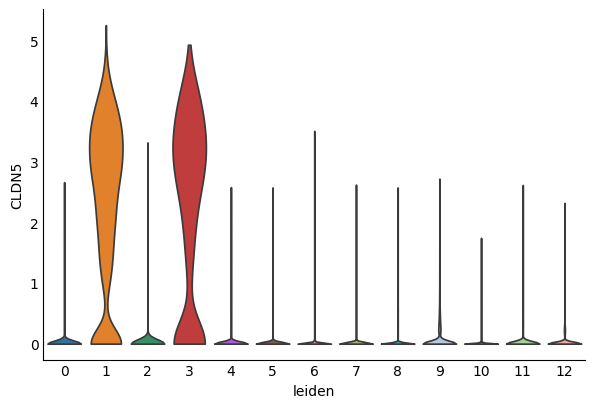

In [62]:
import matplotlib.pyplot as plt
import scanpy as sc

# List of marker genes (replace with your genes of interest)
marker_genes = ["SLC18A2", "SLC6A3", "TH", "RBFOX3","AQP4", "CX3CR1", "VCAN", "OLIG1", "CLDN5"]

# groupby_order = ['2', '8', '1','7','9','10','11','12','5','6','0','3']

# Create individual violin plots for each gene
for i, gene in enumerate(marker_genes):
    # Create the plot for the current gene and store the axes object
    ax = sc.pl.violin(adata,
                      keys=gene,                    # Gene of interest
                      groupby="leiden",              # Grouping by clusters
                      stripplot=False,               # Disable stripplot (no points)
                      jitter=0.4,                    # Adjust jitter for stripplot
                      size=10,                       # Adjust plot size (reduce size to halve the height)
                      # order=groupby_order,           # Sets the order of the clusters
                      show=False)                    # Avoid immediate display

    # Remove the top and right spines (bounding box lines)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Optionally, remove ticks from the top and right side
    ax.tick_params(axis='both', which='both', length=0)  # Remove ticks from top and right


In [63]:
# # Modify the cluster labels
# adata.obs["merged_clusters"] = adata.obs["leiden"].astype(str)  # Ensure string type
# adata.obs["merged_clusters"].replace({"2": "2_8", "8": "2_8"}, inplace=True)

# # Verify the merge
# print(adata.obs["merged_clusters"].unique())

In [64]:
adata.obs['disease__ontology_label'].value_counts()

,count
disease__ontology_label,
normal,80643
Parkinson disease,53314


In [65]:
dopamine_subset = adata[adata.obs["leiden"] == "10"].copy()
dopamine_subset.obs['disease__ontology_label'].value_counts()

,count
disease__ontology_label,
normal,14953
Parkinson disease,2245


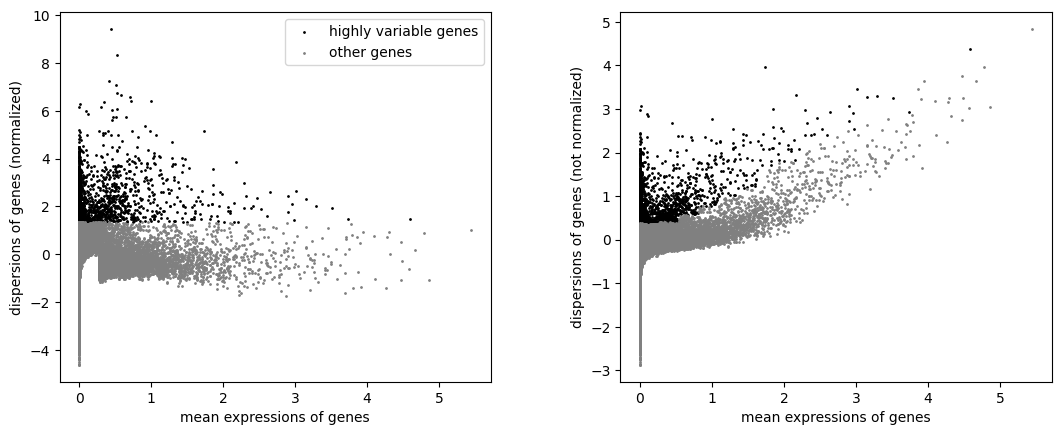

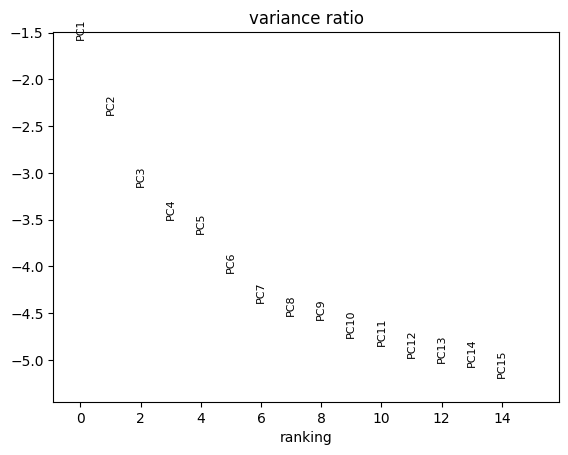

In [66]:
sc.pp.highly_variable_genes(dopamine_subset, n_top_genes=2000)
sc.pl.highly_variable_genes(dopamine_subset)
sc.tl.pca(dopamine_subset, n_comps=15)  # Reduce to 15 PCs
sc.pl.pca_variance_ratio(dopamine_subset, n_pcs=15, log=True)
sc.pp.neighbors(dopamine_subset)
sc.tl.umap(dopamine_subset)

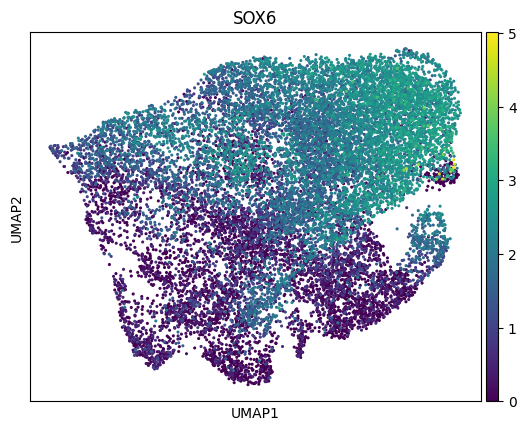

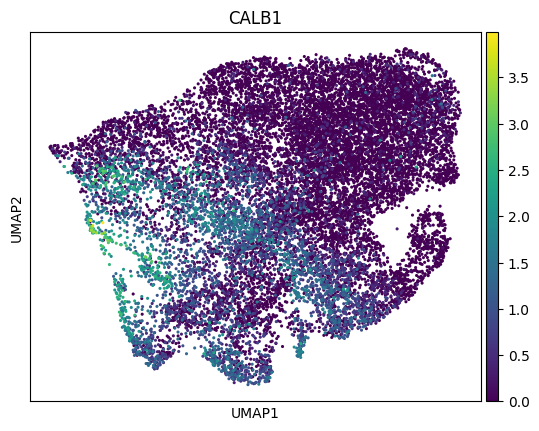

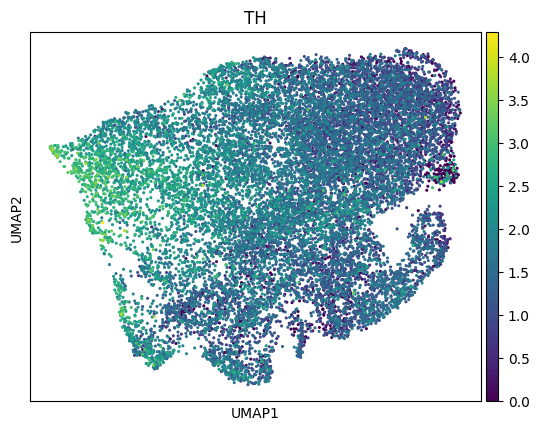

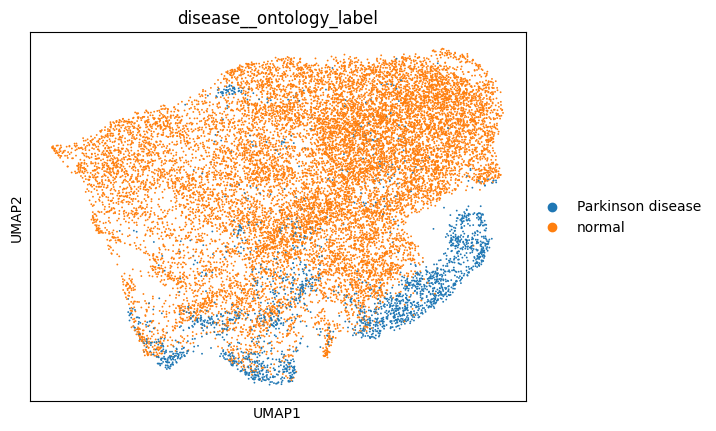

In [67]:
sc.pl.umap(dopamine_subset, color="SOX6", cmap="viridis", size=20)
sc.pl.umap(dopamine_subset, color="CALB1", cmap="viridis", size=20)
sc.pl.umap(dopamine_subset, color="TH", cmap="viridis", size=20)
sc.pl.umap(dopamine_subset, color=["disease__ontology_label"])

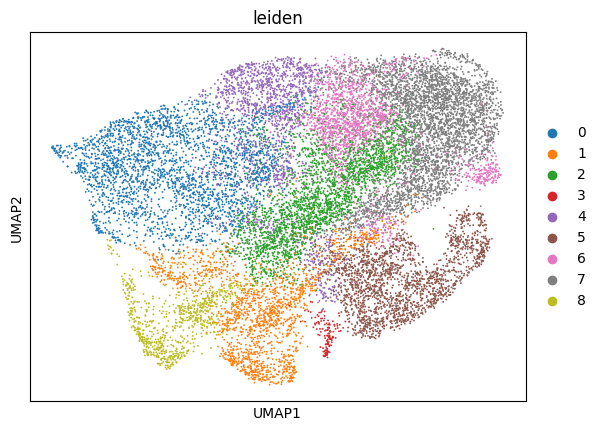

In [68]:
sc.tl.leiden(dopamine_subset, flavor="igraph", n_iterations=2, resolution = 0.3)
sc.pl.umap(dopamine_subset, color=["leiden"])

<ipython-input-69-cf2045ab0b4b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression = dopamine_subset.to_df()[gene].groupby(dopamine_subset.obs[groupby]).mean()


Sorted cluster order: ['7', '6', '2', '0', '4', '1', '5', '8', '3']


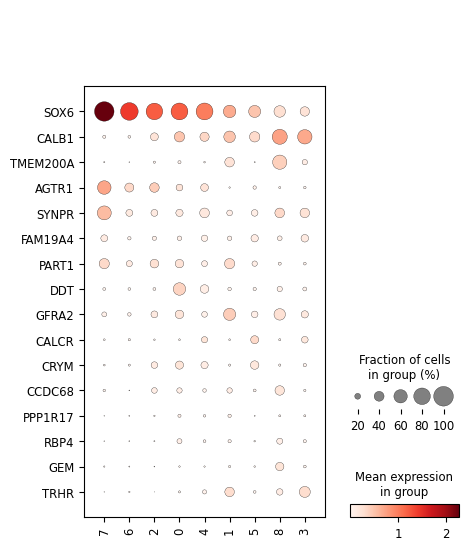

In [69]:
gene = "SOX6"  # Replace with your gene of interest
groupby = "leiden"  # Your clustering column

# Compute mean expression of the gene per cluster
mean_expression = dopamine_subset.to_df()[gene].groupby(dopamine_subset.obs[groupby]).mean()

# Sort clusters based on the expression of the gene
sorted_clusters = mean_expression.sort_values(ascending=False).index.tolist()
print("Sorted cluster order:", sorted_clusters)


# List of genes to visualize
genes = ["SOX6", "CALB1", "TMEM200A", "AGTR1", "SYNPR", "FAM19A4", "PART1", "DDT", "GFRA2", "CALCR", "CRYM", "CCDC68", "PPP1R17", "RBP4", "GEM", "TRHR"]  # Replace with your genes of interest

# Create the dot plot
sc.pl.dotplot(dopamine_subset, var_names=genes, swap_axes = True, groupby=groupby, categories_order=sorted_clusters)

In [70]:
#meta data must be in string format for saving as an h5ad file
dopamine_subset.obs = dopamine_subset.obs.applymap(str)

<ipython-input-70-45084d6e352c>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dopamine_subset.obs = dopamine_subset.obs.applymap(str)


In [71]:
# Display the first 10 genes in the var_names
dopamine_subset.var_names

Index(['RP11-34P13.3', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'RP11-34P13.14', 'RP11-34P13.9', 'FO538757.3', 'FO538757.2',
       'AP006222.2',
       ...
       'RNU2-71P', 'RNA5SP252', 'AC116533.2', 'AC114494.1', 'RN7SL424P',
       'RN7SL739P', 'MIR4502', 'RNU4-10P', 'RN7SL865P', 'RNU6-191P'],
      dtype='object', length=41625)

In [72]:
!pip install mygene

In [73]:
import mygene
import pandas as pd

# Initialize MyGene.info
mg = mygene.MyGeneInfo()

# Example gene list

gene_symbols = dopamine_subset.var_names.tolist()  # Example gene symbols list

# Query MyGene.info
query_result = mg.querymany(gene_symbols, scopes="symbol", fields="ensembl.gene", species="human")

# Process the results
gene_mapping = {}
for entry in query_result:
    gene_symbol = entry["query"]

    # Check if "ensembl" exists in the entry
    ensembl_data = entry.get("ensembl", "Not Found")

    # If it's a list, take the first entry
    if isinstance(ensembl_data, list):
        ensembl_id = ensembl_data[0]["gene"]  # Take the first Ensembl ID
    elif isinstance(ensembl_data, dict):
        ensembl_id = ensembl_data["gene"]
    else:
        ensembl_id = "Not Found"

    gene_mapping[gene_symbol] = ensembl_id

# Convert to DataFrame
df_mapping = pd.DataFrame(list(gene_mapping.items()), columns=["Gene Symbol", "Ensembl ID"])

INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-16000 ...
INFO:biothings.client:querying 16001-17000 ...
INFO:biothings.client:querying 17001-18000 ...
INFO:biothings.client:querying 18001-19000 ...
INFO:biothings.client:querying 19001-20000 ...
INFO:biothings.client:querying 20001-21000 ...
INFO:biothings.client:querying 2100

In [74]:
# Set Ensembl IDs for corresponding gene symbols
dopamine_subset.var["ensembl_id"] = [gene_mapping.get(gene, gene) for gene in gene_symbols]

# Optionally, store the original gene symbols in adata.var
dopamine_subset.var["original_gene_symbols"] = gene_symbols

In [75]:
#many non coding RNAs do not have ensembl ids, for this analysis they are removed

dopamine_subset = dopamine_subset[:, dopamine_subset.var["ensembl_id"] != "Not Found"]
dopamine_subset.var_names[0:5]

Index(['FAM138A', 'OR4F5', 'OR4F29', 'OR4F16', 'FAM87B'], dtype='object')

In [76]:
# additional formattings for tokenization

sc.pp.highly_variable_genes(dopamine_subset, n_top_genes=5000)  # You can choose how many genes to keep
dopamine_subset = dopamine_subset[:, dopamine_subset.var['highly_variable']]  # Keep only HVGs

sc.pp.scale(dopamine_subset, max_value=10)  # Optional: scaling genes to zero mean and unit variance

dopamine_subset.obs.rename(columns={"disease__ontology_label": "disease_state"}, inplace=True)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:700: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [77]:
# this should now be formatted correctly for geneformer
dopamine_subset.write('/content/drive/MyDrive/HODD/Geneformer_parkinsons_files/dopamine_subset_pre_tokenization.h5ad')